# Classification - k-nearest-neighbors - Major Occupation

In [1]:
# Import feature subset with Major_Occupation Column and one hot encoded values

from sklearn import neighbors, datasets
import pandas as pd
import sys
sys.path.append('../resources')
from w6support import plot_2d_class

# Make sure the pic subdirectory exists
import os, errno
try:
    os.makedirs('pic')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string

In [2]:
originalDF = pd.read_csv('occupationFeatureSubset.csv')
dfOHE = pd.read_csv('oheTransformedData.csv')
dfOHE['Major_Occupation'] = pd.Series(originalDF['Major_Occupation'], index=dfOHE.index)
dfOHE.fillna(0, inplace=True)

# Next we check the Major_Occupation options in the dataset for use with classification
print(dfOHE.Major_Occupation.unique())

# Now we replace those values with integers for use with the classification algorithm
occupation_values = {"Major_Occupation": {"Professional": 1, "Education": 2, "Computer": 3, "Other": 4, "Management": 5}}
dfOHE.replace(occupation_values, inplace=True)

['Professional' 'Education' 'Computer' 'Other' 'Management']


In [3]:
X, y = dfOHE.loc[:, dfOHE.columns != 'Major_Occupation'], dfOHE['Major_Occupation']

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

With knn, you can determine membership probabilities for each of the 3 labels. As you can see, the predict() function just picks the most likely label.

In [4]:
# What kind of occupation has years on internet (1-3), web ordering (yes),Not_Purchasing_Security, age(35) 
# call the "predict" method:
result = knn.predict([[1,0,0,0,0,1,0,0,0,0,0,0,1,35],])

for key, val in occupation_values['Major_Occupation'].items():
    if val == result:
        print(key)

ValueError: query data dimension must match training data dimension

In [4]:
knn.predict_proba([[1,0,0,0,0,1,0,0,0,0,0,0,1,35],]) 

array([[0.2, 0.2, 0.4, 0.2, 0. ]])

In the next block of code, we take each pair of predictors and use the k-nearest-neighbour algorithm with k=3,5,7. 

Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet1.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet2.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet3.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet4.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering0.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering1.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering2.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingPrivacy.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingPreferPeople.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingTooComplicated.pdf
Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingEasier

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet1_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet2_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet3_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet4_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering0_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering1_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_WebOrdering2_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPrivacy_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPrivacy_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPreferPeople_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingPreferPeople_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingTooComplicated_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingTooComplicated_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingTooComplicated_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingEasierLocally_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingEasierLocally_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_3_nearest-neighbours_Occupation_NotPurchasingSecurity_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet0_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_YearsOnInternet2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet1_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_YearsOnInternet3.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet2_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_YearsOnInternet4.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet3_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering0.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_YearsOnInternet4_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_WebOrdering1.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingPrivacy.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingPreferPeople.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingTooComplicated.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingEasierLocally.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_NotPurchasingSecurity.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering0_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file pic/k_5_nearest-neighbours_Occupation_WebOrdering1_WebOrdering2.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

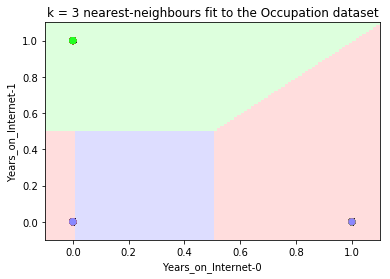

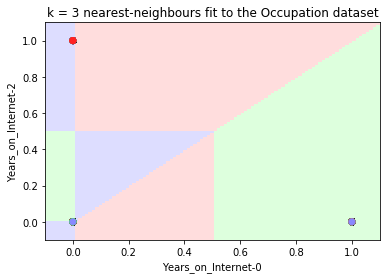

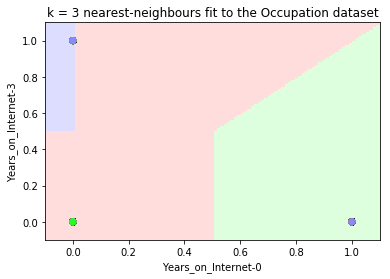

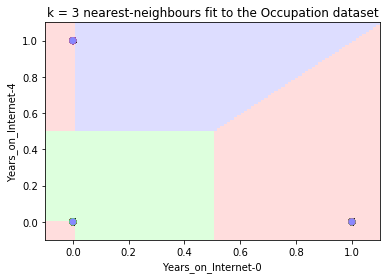

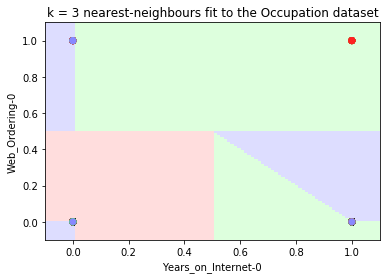

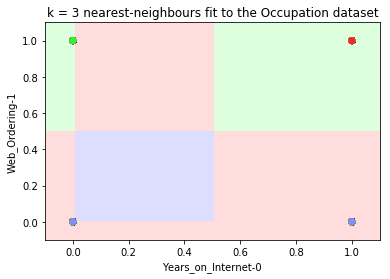

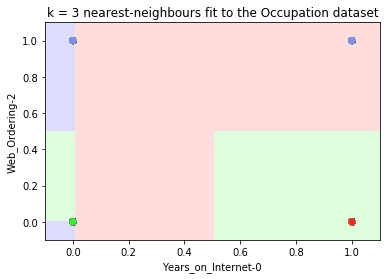

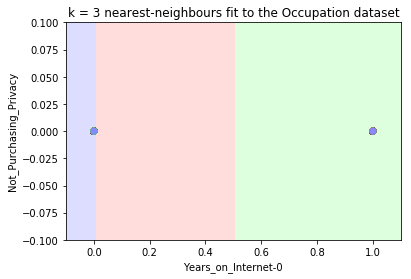

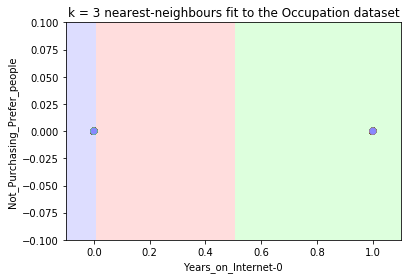

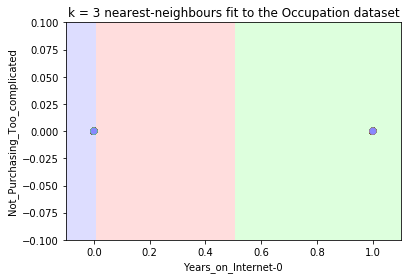

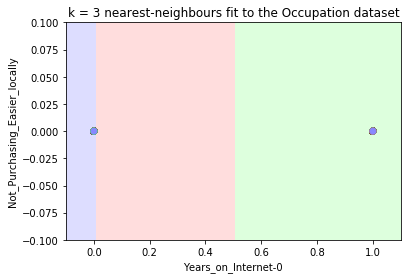

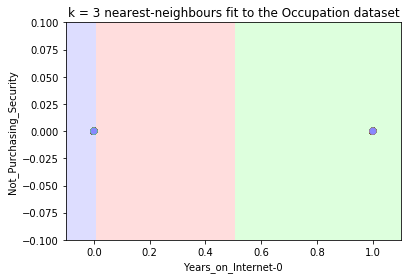

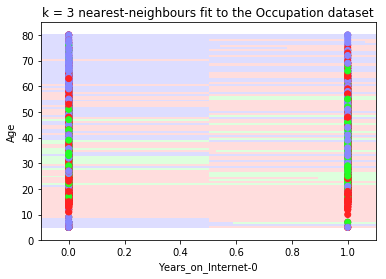

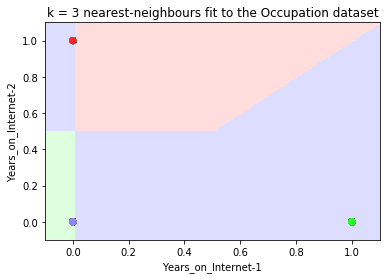

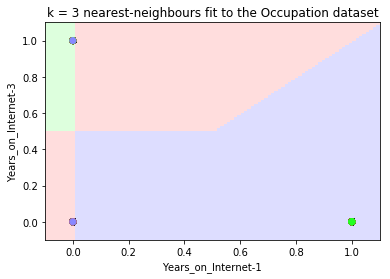

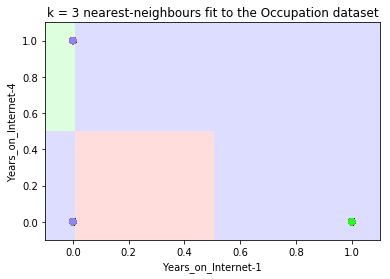

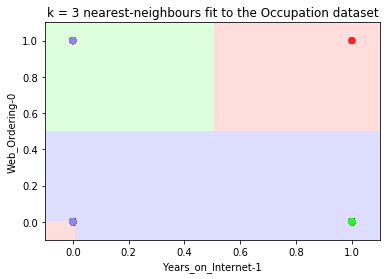

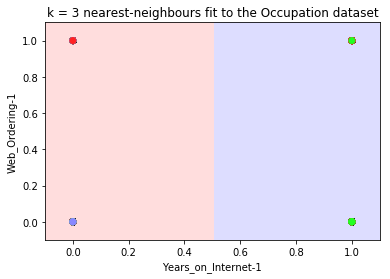

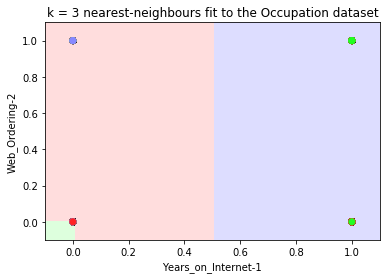

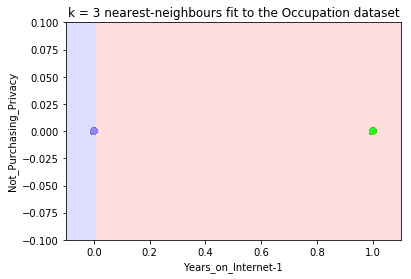

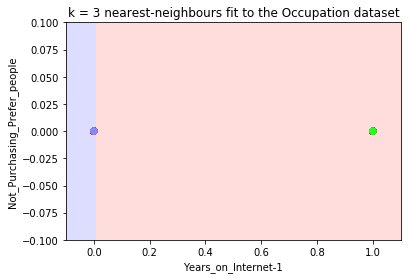

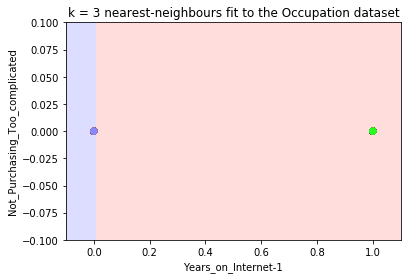

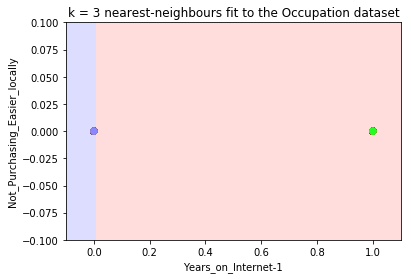

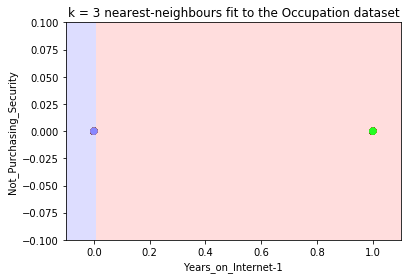

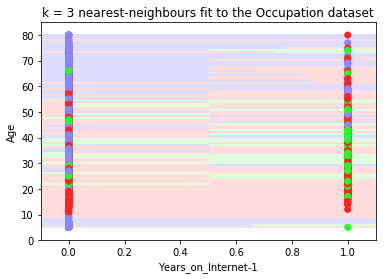

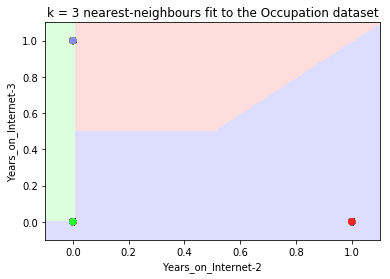

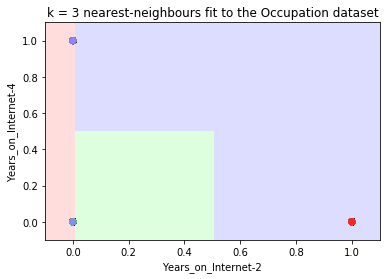

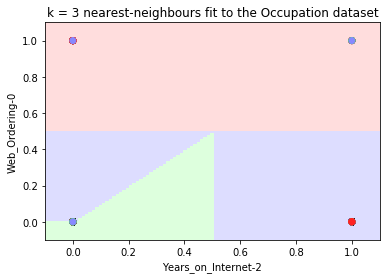

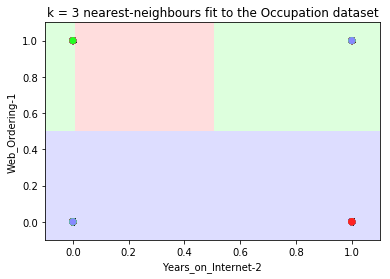

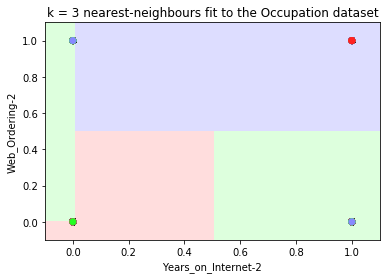

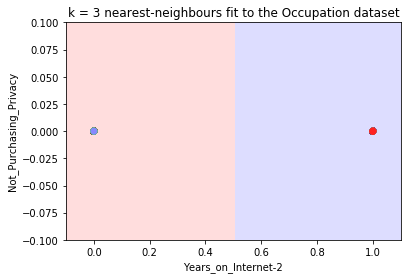

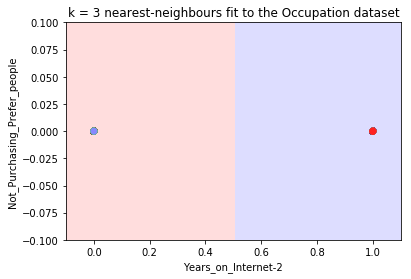

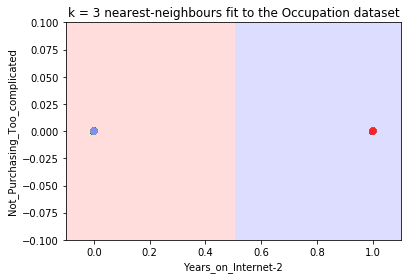

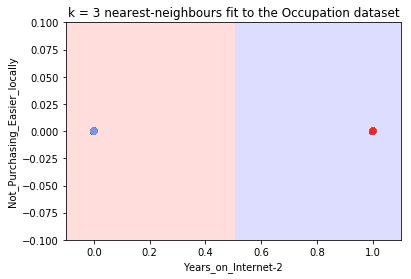

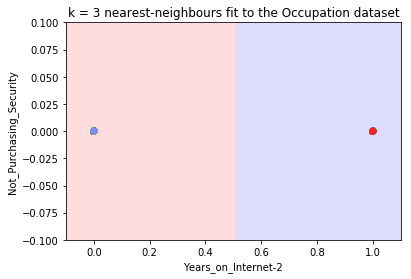

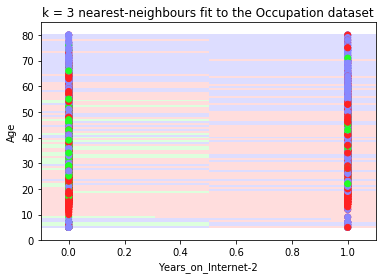

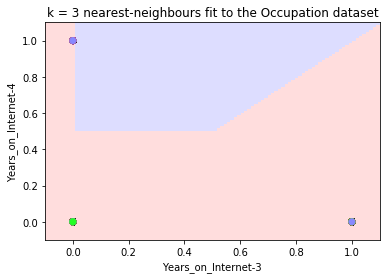

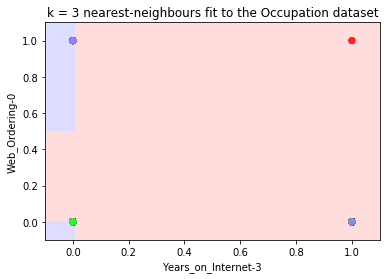

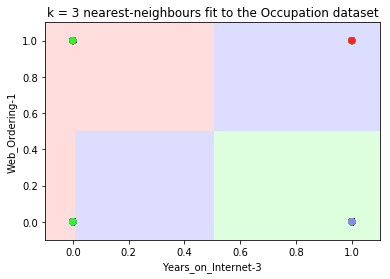

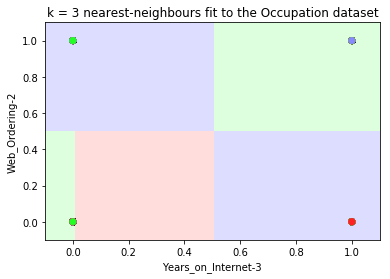

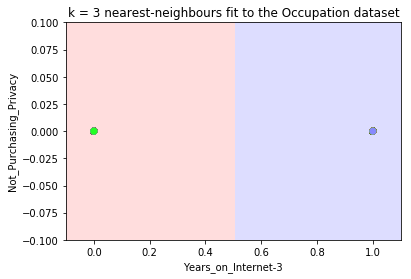

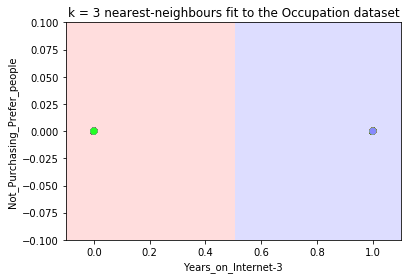

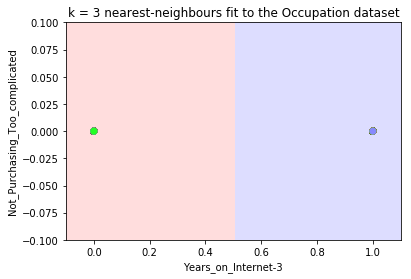

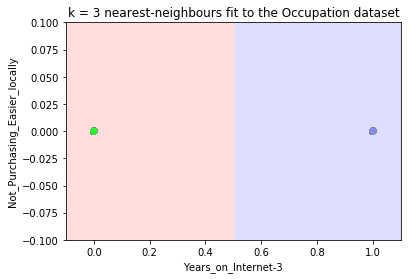

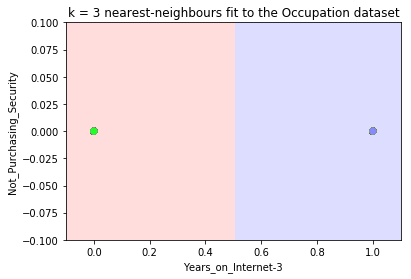

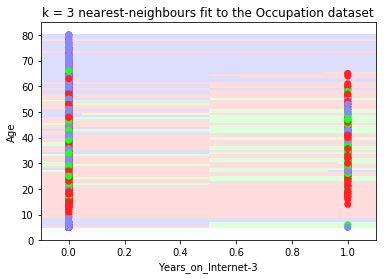

In [ ]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

#predNames = list(iris.data) # https://stackoverflow.com/a/19483025, except iris.data is an array, not a dataframe
predNames = list(dfOHE.columns[dfOHE.columns != 'Major_Occupation'])

df=pd.DataFrame(dfOHE, columns=predNames)
nTrain = df.shape[0]
y = dfOHE['Major_Occupation']

pattern = re.compile('[\W_]+', re.UNICODE) # https://stackoverflow.com/a/1277047
for neighborCnt in range(3,8,2): # from 3 to a maximum of 8, in steps of 2, so 3,5,7
  knn = neighbors.KNeighborsClassifier(n_neighbors=neighborCnt)
  for twoCols in itertools.combinations(predNames, 2): # https://stackoverflow.com/a/374645
    X = df[list(twoCols)]  # we only take two features at a time
    colNames = X.columns
    c1 = colNames[:1][0] # first of 2
    c2 = colNames[-1:][0] # last of 2
    c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
    c2 = pattern.sub("",c2.title())
    knn.fit(X, y)
    plotTitle = "k = %i %s fit to the %s dataset" % (neighborCnt, "nearest-neighbours", "Occupation")
    fileTitle = "pic/k_%i_%s_%s_%s_%s.pdf" % (neighborCnt, "nearest-neighbours", "Occupation", c1, c2)
    print("Plotting file %s" % (fileTitle))
    plot_2d_class(X, y, nTrain, knn, plotTitle, fileTitle, cmap_light, cmap_bold)



## Model Validation

The k-nearest-neighbours classification "model" should be validated. Clearly, the parameter $k$ is critical to its performance. Generally, smaller values of $k$ fit the training set more accurately (less bias) but generalise less well to test data (more variance). The opposite applies to larger values of $k$.

With $k$ set to its minimum value ($k = 1$), it fits the training set exactly and the confusion matrix is optimal:

In [9]:
from sklearn.neighbors import KNeighborsClassifier
X, y = dfOHE.loc[:, dfOHE.columns != 'Major_Occupation'], dfOHE['Major_Occupation']
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)
y_pred1 = knn1.predict(X)
print(np.all(y == y_pred1))

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y, y_pred1))

False
Accuracy: 0.8484368816778789


The *confusion matrix* highlights where classification differences arise, as these occur on the off-diagognal elements of the matrix:

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y, y_pred1))
print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred1, digits=3))

0.8484368816778789
[[1775   69  136  110   73]
 [  69 2079  101   51   39]
 [ 122   85 1745   69   64]
 [ 115   54   50 2042   78]
 [  85   30   63   69  935]]
              precision    recall  f1-score   support

           1      0.819     0.821     0.820      2163
           2      0.897     0.889     0.893      2339
           3      0.833     0.837     0.835      2085
           4      0.872     0.873     0.873      2339
           5      0.786     0.791     0.789      1182

   micro avg      0.848     0.848     0.848     10108
   macro avg      0.842     0.842     0.842     10108
weighted avg      0.849     0.848     0.849     10108



All 50 training samples for each class are identified correctly, as expected when $k = 1$ (accuracy score is 1, off-diagonal terms are 0, the classification report (relative to the trsining set) is "too good to be true"...

Note:

1. The _Recall_ of the $i^{\mbox{th}}$ predictor is $R_i \equiv c_{ii} / \sum_j c_{ij}$, which is the ratio of the $i^{\mbox{th}}$ diagonal element to the sum of the elements of the confusion matrix $C = \{c_{ij}\}$ in that _column_.
2. The _Precision_ of the $j^{\mbox{th}}$ predictor is $P_j \equiv c_{jj} / \sum_i c_{ij}$, which is the ratio of the $j^{\mbox{th}}$ diagonal element to the sum of the elements of the confusion matrix $C = \{c_{ij}\}$ in that _row_.
3. $F_1$-score is defined as $F_1 = 2\frac{R_i P_i}{R_i + P_i}$.

To test how the model generalizes to the training set, we hold back some of the training data by splitting the training data into a _training set_ and a _testing set_. We hold back 20% and stratify based on the data labels $y$, so each of the row counts in the confusion matrix should be $0.2 * 50 = 10$.

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify=y)
knn1.fit(Xtrain, ytrain)
ypred1s = knn1.predict(Xtest)
print(accuracy_score(ytest, ypred1s))
print(confusion_matrix(ytest, ypred1s))
print(classification_report(ytest, ypred1s, digits=3))

0.34718100890207715
[[150 100 132 185  82]
 [ 71 388 119  97  27]
 [117 134 187 105  82]
 [160  97  97 271  77]
 [ 79  49  74  96  57]]
              precision    recall  f1-score   support

           1      0.260     0.231     0.245       649
           2      0.505     0.553     0.528       702
           3      0.307     0.299     0.303       625
           4      0.359     0.386     0.372       702
           5      0.175     0.161     0.168       355

   micro avg      0.347     0.347     0.347      3033
   macro avg      0.321     0.326     0.323      3033
weighted avg      0.340     0.347     0.343      3033



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

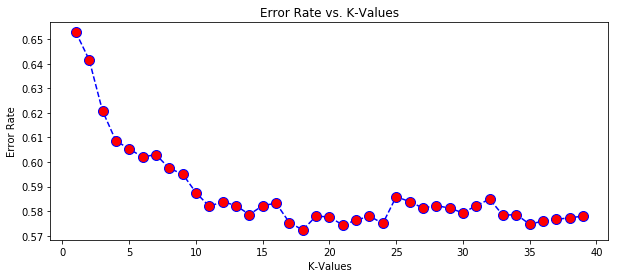

In [13]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [17]:
knn3 = KNeighborsClassifier(n_neighbors=17)
knn3.fit(X, y)
y_pred3 = knn3.predict(X)
print(accuracy_score(y, y_pred3))
print(confusion_matrix(y, y_pred3))
print(classification_report(y, y_pred3, digits=3))

0.49317372378314206
[[ 985  167  440  514   57]
 [ 297 1524  284  210   24]
 [ 520  263 1026  223   53]
 [ 506  207  236 1335   55]
 [ 385   79  265  338  115]]
              precision    recall  f1-score   support

           1      0.366     0.455     0.406      2163
           2      0.680     0.652     0.666      2339
           3      0.456     0.492     0.473      2085
           4      0.510     0.571     0.538      2339
           5      0.378     0.097     0.155      1182

   micro avg      0.493     0.493     0.493     10108
   macro avg      0.478     0.453     0.448     10108
weighted avg      0.492     0.493     0.481     10108



Note that 6 observations (3 each of species 2 and 3) are not classified the same as the human experts. However, this might also indicate something interesting about those observations. They could be outliers (not classified correctly) but, at the very least, they are extreme observations.

Now we try holding back 20% of the training set for use as test observations, leaving 80% of the training data to train the classifier. We then look at what happens to the confusion matrix. Note that sampling the data like this could result in *better* relative performance, depending on what happens to the 6 problematic observations.

In [18]:
knn3.fit(Xtrain, ytrain)
ypred3s = knn3.predict(Xtest)
print(accuracy_score(ytest, ypred3s))
print(confusion_matrix(ytest, ypred3s))
print(classification_report(ytest, ypred3s, digits=3))

0.4246620507748104
[[209  69 152 193  26]
 [ 85 446  96  69   6]
 [179  96 250  82  18]
 [165  74  80 359  24]
 [120  17  78 116  24]]
              precision    recall  f1-score   support

           1      0.276     0.322     0.297       649
           2      0.635     0.635     0.635       702
           3      0.381     0.400     0.390       625
           4      0.438     0.511     0.472       702
           5      0.245     0.068     0.106       355

   micro avg      0.425     0.425     0.425      3033
   macro avg      0.395     0.387     0.380      3033
weighted avg      0.415     0.425     0.413      3033



## PCA Transformation

In [19]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

# Now we should split our data into a training set and a test set in order to properly assess our model using PCA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

# 2-Dimensions
X_train[:5]

array([[-0.76995728, -0.52624287],
       [-0.48446513,  0.00212657],
       [-0.8894326 , -0.10226364],
       [-0.8095058 , -0.45917122],
       [ 1.05641304, -0.65772906]])

In [21]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
y_predict = knn_model.predict(X_test)
y_predict

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict, digits=3))

0.39097744360902253
[[215  87 116 113  34]
 [ 99 331  74  60   8]
 [155  99 178  60  33]
 [157  80  59 242  36]
 [ 81  38  74  76  22]]
              precision    recall  f1-score   support

           1      0.304     0.381     0.338       565
           2      0.521     0.579     0.548       572
           3      0.355     0.339     0.347       525
           4      0.439     0.422     0.430       574
           5      0.165     0.076     0.104       291

   micro avg      0.391     0.391     0.391      2527
   macro avg      0.357     0.359     0.353      2527
weighted avg      0.379     0.391     0.381      2527



Because we used principle component analysis to reduce the dimensions, we can use our model to plot the decision boundaries based on our training data and 
where our test data falls relative to these boundaries

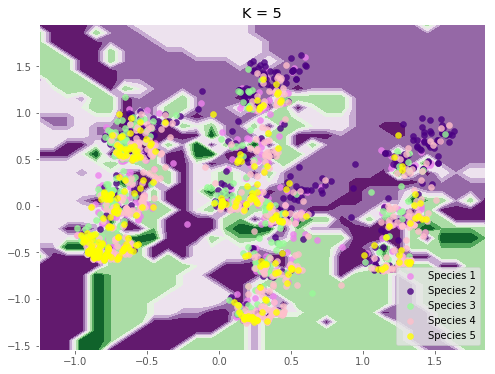

In [26]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot') 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {1: 'violet', 2: 'indigo', 3: 'palegreen', 4: 'pink', 5: 'yellow'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label='Species {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()